# Employee Attrition - Data Visualizations

This notebook contains comprehensive visualizations for the employee attrition analysis.

## Visualizations:
1. Attrition distribution and patterns
2. Demographic analysis
3. Job-related factors
4. Satisfaction and work-life balance
5. Income and compensation analysis
6. Stress and performance metrics


In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Add src to path
project_root = Path().resolve().parent
sys.path.append(str(project_root))

# Import custom utilities
from src.utils import load_data, get_data_path, save_figure

# Set display options
pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 7)
plt.rcParams['font.size'] = 11

# Color palette for attrition
attrition_colors = {'Yes': '#e74c3c', 'No': '#2ecc71'}


In [2]:
# Load cleaned data
data_path = get_data_path('cleaned_data.csv', subfolder='processed')
df = load_data(data_path)

print(f"Data loaded: {df.shape}")
print(f"Attrition distribution:\n{df['Attrition'].value_counts()}")


Data loaded: (1470, 41)
Attrition distribution:
Attrition
No     1232
Yes     238
Name: count, dtype: int64


## 1. Attrition Overview


Figure saved to: C:\Users\ADMIN\Documents\GitHub\Business-Analytics\outputs\figures\01_attrition_overview.png


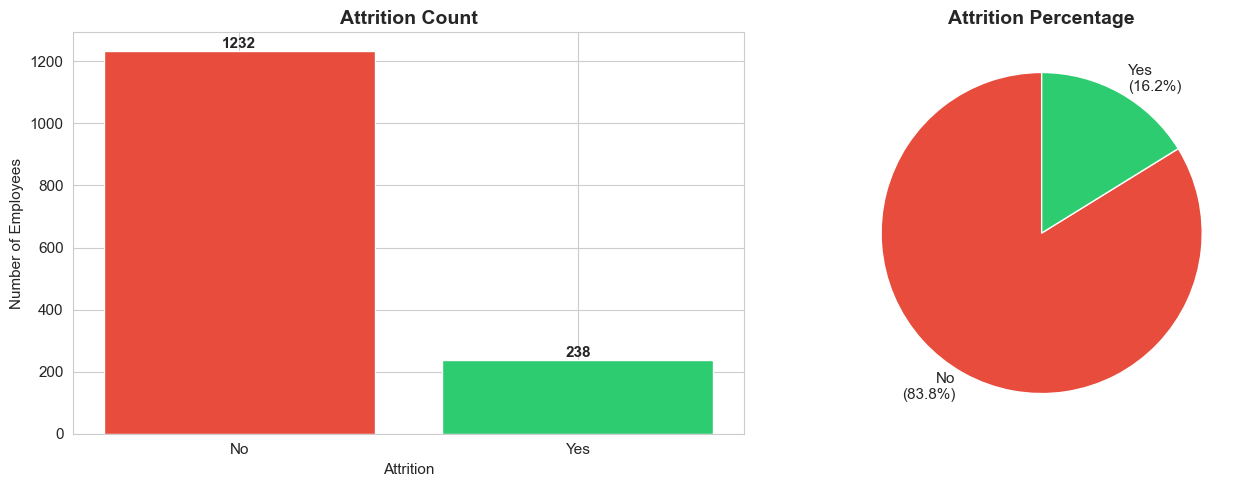

In [3]:
# Attrition distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
attrition_counts = df['Attrition'].value_counts()
axes[0].bar(attrition_counts.index, attrition_counts.values, color=[attrition_colors['Yes'], attrition_colors['No']])
axes[0].set_title('Attrition Count', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Number of Employees')
axes[0].set_xlabel('Attrition')
for i, v in enumerate(attrition_counts.values):
    axes[0].text(i, v + 10, str(v), ha='center', fontweight='bold')

# Pie chart
attrition_pct = df['Attrition'].value_counts(normalize=True) * 100
axes[1].pie(attrition_pct.values, labels=[f'{label}\n({pct:.1f}%)' for label, pct in zip(attrition_pct.index, attrition_pct.values)],
            colors=[attrition_colors['Yes'], attrition_colors['No']], autopct='', startangle=90)
axes[1].set_title('Attrition Percentage', fontsize=14, fontweight='bold')

plt.tight_layout()
save_figure(fig, '01_attrition_overview.png')
plt.show()


## 2. Demographic Analysis


Figure saved to: C:\Users\ADMIN\Documents\GitHub\Business-Analytics\outputs\figures\02_demographic_analysis.png


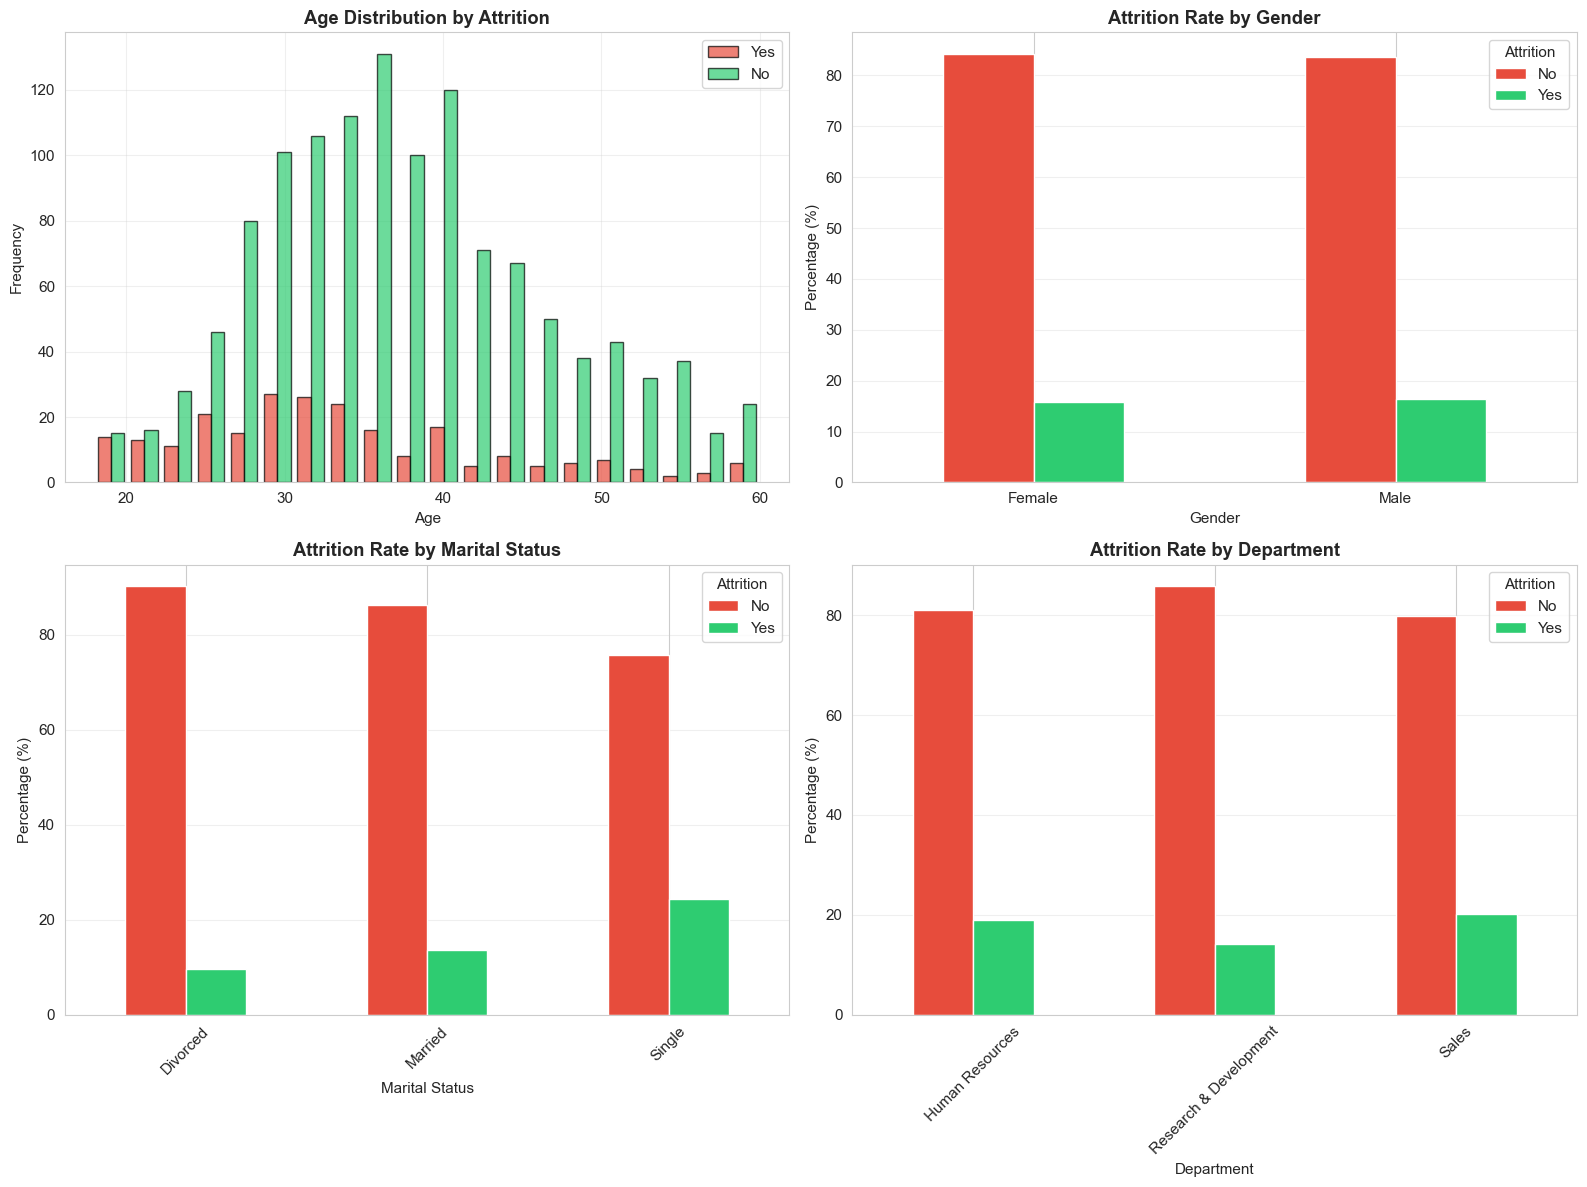

In [4]:
# Age distribution by Attrition
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Age distribution
axes[0, 0].hist([df[df['Attrition']=='Yes']['Age'], df[df['Attrition']=='No']['Age']], 
                bins=20, label=['Yes', 'No'], color=[attrition_colors['Yes'], attrition_colors['No']], alpha=0.7, edgecolor='black')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Age Distribution by Attrition', fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Gender and Attrition
gender_attrition = pd.crosstab(df['Gender'], df['Attrition'], normalize='index') * 100
gender_attrition.plot(kind='bar', ax=axes[0, 1], color=[attrition_colors['Yes'], attrition_colors['No']])
axes[0, 1].set_title('Attrition Rate by Gender', fontweight='bold')
axes[0, 1].set_ylabel('Percentage (%)')
axes[0, 1].set_xlabel('Gender')
axes[0, 1].legend(title='Attrition')
axes[0, 1].tick_params(axis='x', rotation=0)
axes[0, 1].grid(True, alpha=0.3, axis='y')

# Marital Status and Attrition
marital_attrition = pd.crosstab(df['MaritalStatus'], df['Attrition'], normalize='index') * 100
marital_attrition.plot(kind='bar', ax=axes[1, 0], color=[attrition_colors['Yes'], attrition_colors['No']])
axes[1, 0].set_title('Attrition Rate by Marital Status', fontweight='bold')
axes[1, 0].set_ylabel('Percentage (%)')
axes[1, 0].set_xlabel('Marital Status')
axes[1, 0].legend(title='Attrition')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].grid(True, alpha=0.3, axis='y')

# Department and Attrition
dept_attrition = pd.crosstab(df['Department'], df['Attrition'], normalize='index') * 100
dept_attrition.plot(kind='bar', ax=axes[1, 1], color=[attrition_colors['Yes'], attrition_colors['No']])
axes[1, 1].set_title('Attrition Rate by Department', fontweight='bold')
axes[1, 1].set_ylabel('Percentage (%)')
axes[1, 1].set_xlabel('Department')
axes[1, 1].legend(title='Attrition')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
save_figure(fig, '02_demographic_analysis.png')
plt.show()


## 3. Job-Related Factors


Figure saved to: C:\Users\ADMIN\Documents\GitHub\Business-Analytics\outputs\figures\03_job_factors.png


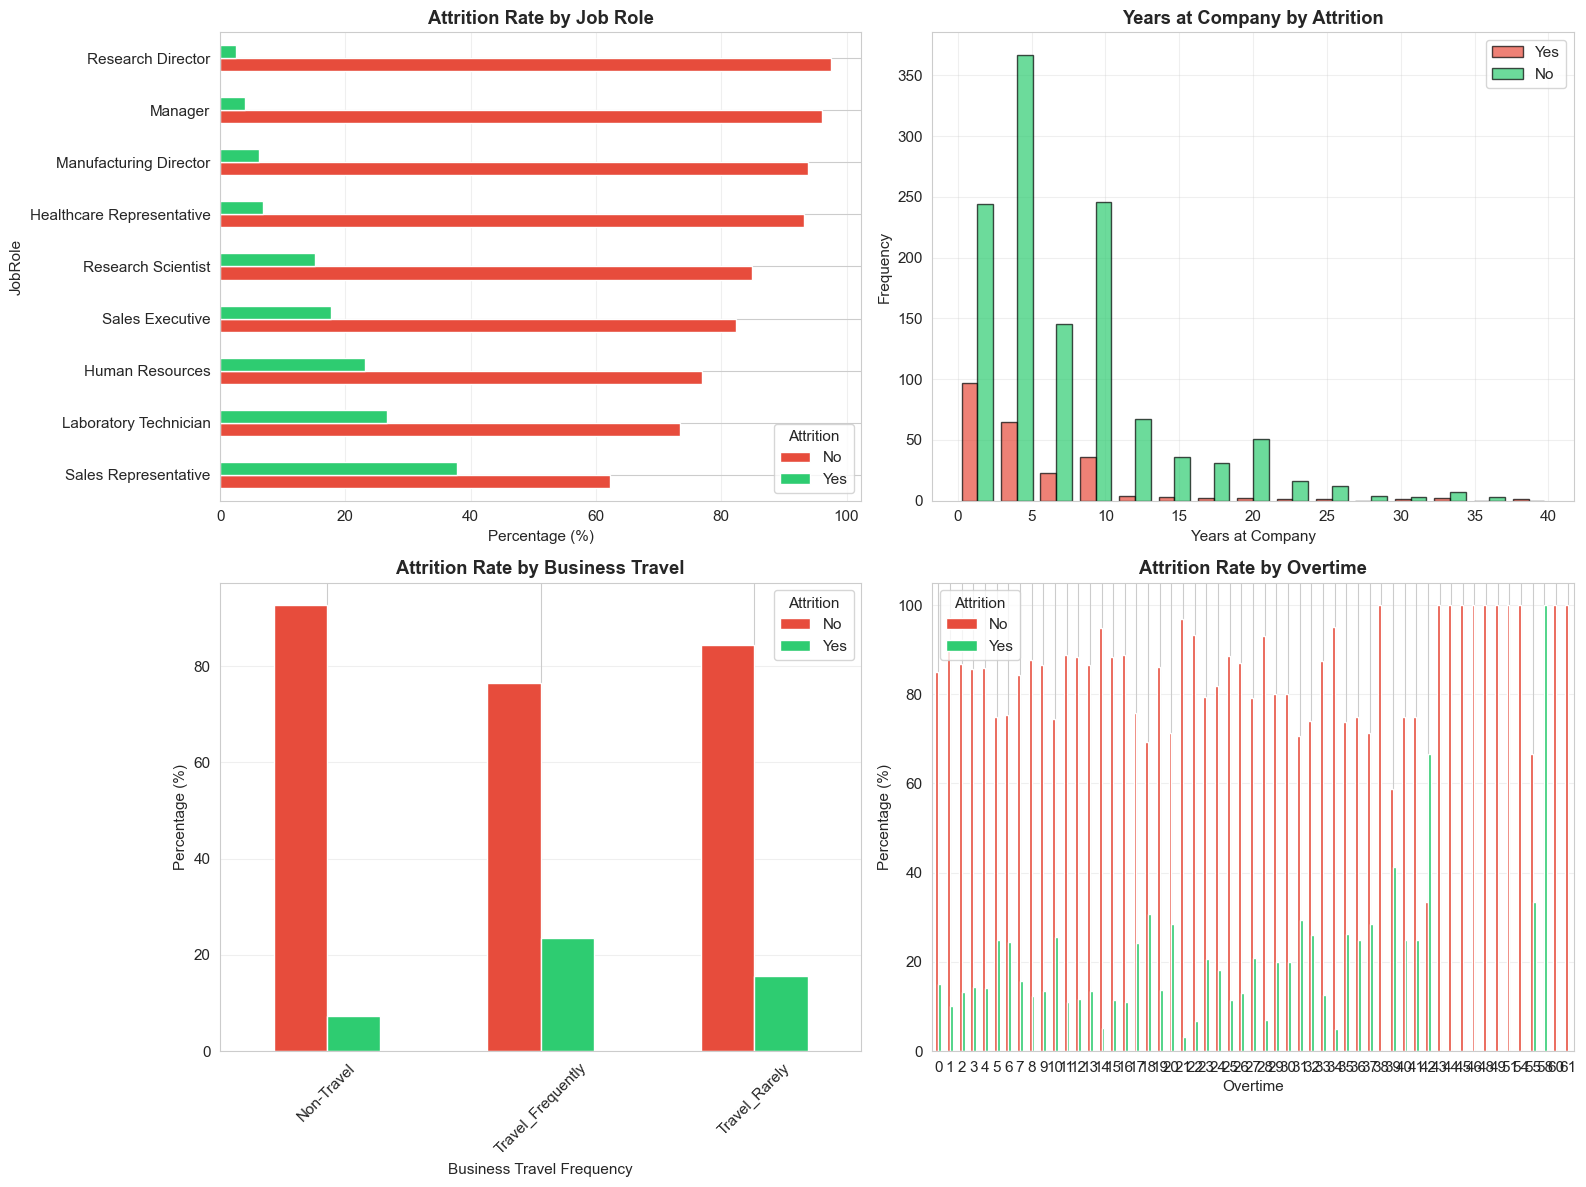

In [5]:
# Job-related factors
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Job Role and Attrition
jobrole_attrition = pd.crosstab(df['JobRole'], df['Attrition'], normalize='index') * 100
jobrole_attrition = jobrole_attrition.sort_values('Yes', ascending=False)
jobrole_attrition.plot(kind='barh', ax=axes[0, 0], color=[attrition_colors['Yes'], attrition_colors['No']])
axes[0, 0].set_title('Attrition Rate by Job Role', fontweight='bold')
axes[0, 0].set_xlabel('Percentage (%)')
axes[0, 0].legend(title='Attrition')
axes[0, 0].grid(True, alpha=0.3, axis='x')

# Years at Company
axes[0, 1].hist([df[df['Attrition']=='Yes']['YearsAtCompany'], df[df['Attrition']=='No']['YearsAtCompany']], 
                bins=15, label=['Yes', 'No'], color=[attrition_colors['Yes'], attrition_colors['No']], alpha=0.7, edgecolor='black')
axes[0, 1].set_xlabel('Years at Company')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Years at Company by Attrition', fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Business Travel
travel_attrition = pd.crosstab(df['BusinessTravel'], df['Attrition'], normalize='index') * 100
travel_attrition.plot(kind='bar', ax=axes[1, 0], color=[attrition_colors['Yes'], attrition_colors['No']])
axes[1, 0].set_title('Attrition Rate by Business Travel', fontweight='bold')
axes[1, 0].set_ylabel('Percentage (%)')
axes[1, 0].set_xlabel('Business Travel Frequency')
axes[1, 0].legend(title='Attrition')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].grid(True, alpha=0.3, axis='y')

# Overtime
overtime_attrition = pd.crosstab(df['OverTime'], df['Attrition'], normalize='index') * 100
overtime_attrition.plot(kind='bar', ax=axes[1, 1], color=[attrition_colors['Yes'], attrition_colors['No']])
axes[1, 1].set_title('Attrition Rate by Overtime', fontweight='bold')
axes[1, 1].set_ylabel('Percentage (%)')
axes[1, 1].set_xlabel('Overtime')
axes[1, 1].legend(title='Attrition')
axes[1, 1].tick_params(axis='x', rotation=0)
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
save_figure(fig, '03_job_factors.png')
plt.show()


## 4. Satisfaction and Work-Life Balance


Figure saved to: C:\Users\ADMIN\Documents\GitHub\Business-Analytics\outputs\figures\04_satisfaction_metrics.png


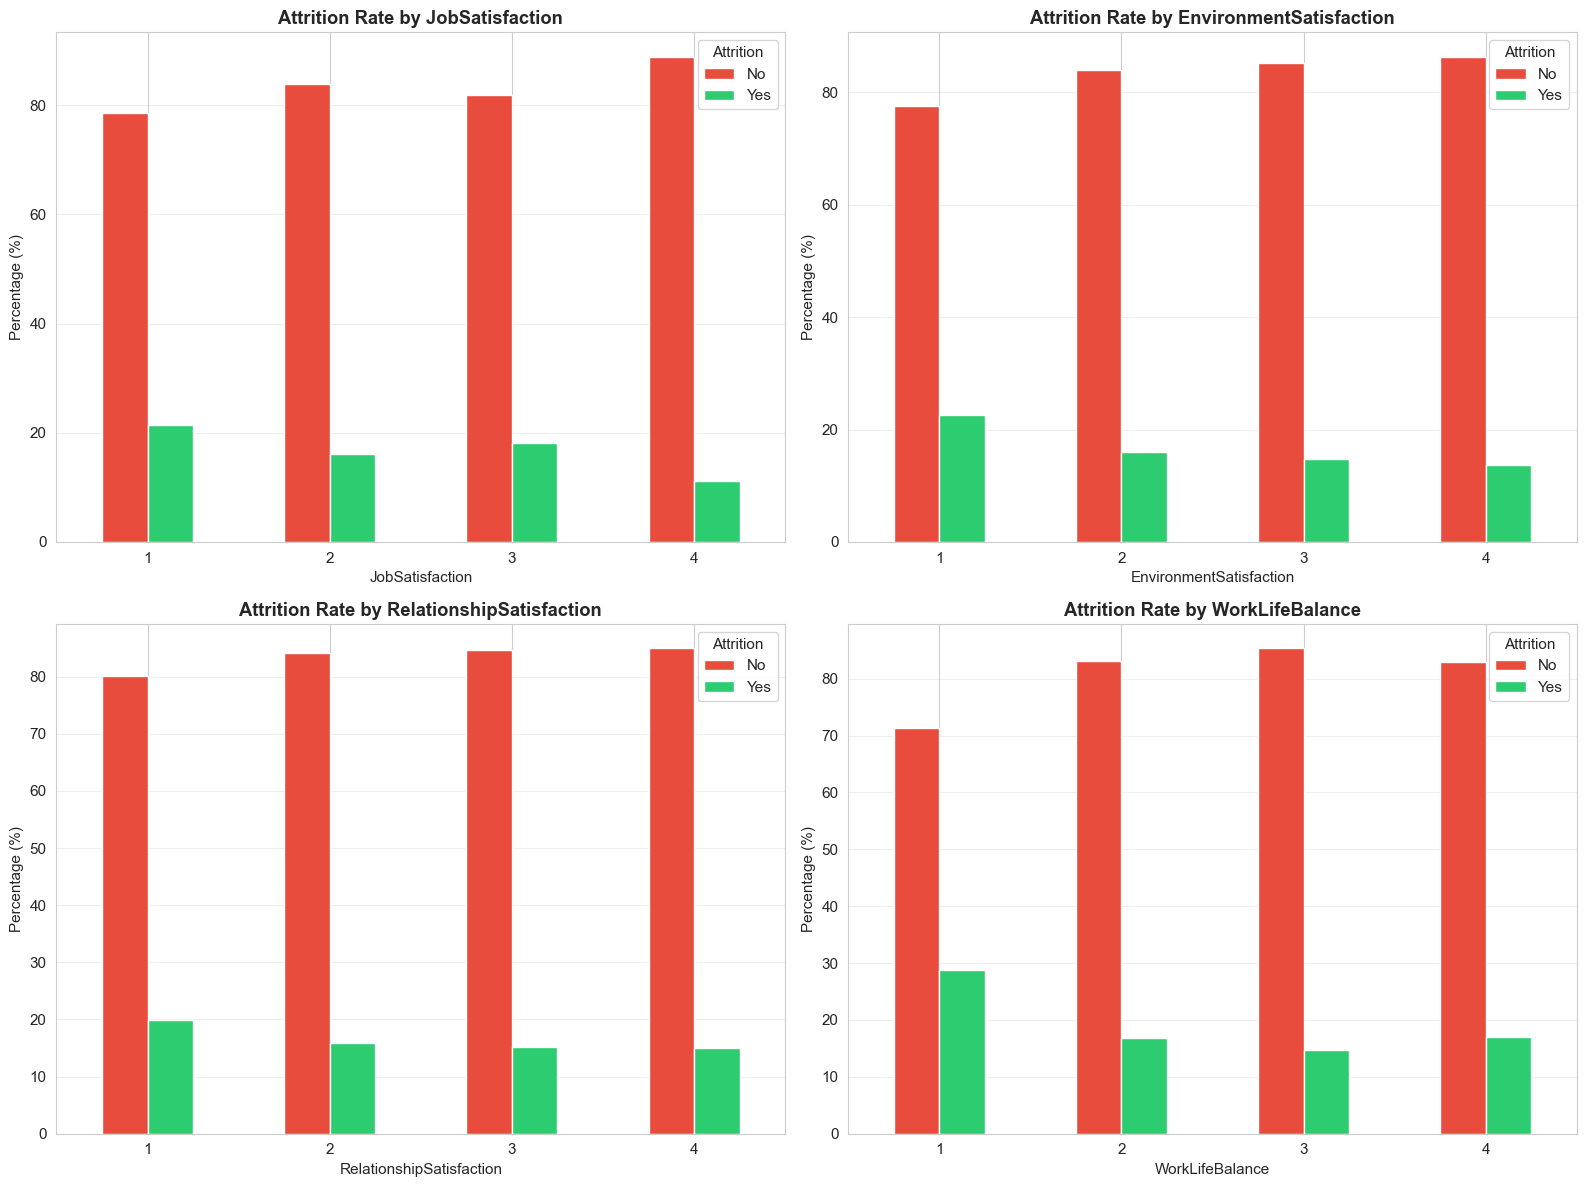

In [6]:
# Satisfaction metrics
satisfaction_cols = ['JobSatisfaction', 'EnvironmentSatisfaction', 'RelationshipSatisfaction', 'WorkLifeBalance']

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

for idx, col in enumerate(satisfaction_cols):
    ax = axes[idx // 2, idx % 2]
    
    # Create grouped bar chart
    satisfaction_attrition = pd.crosstab(df[col], df['Attrition'], normalize='index') * 100
    satisfaction_attrition.plot(kind='bar', ax=ax, color=[attrition_colors['Yes'], attrition_colors['No']])
    ax.set_title(f'Attrition Rate by {col}', fontweight='bold')
    ax.set_ylabel('Percentage (%)')
    ax.set_xlabel(col)
    ax.legend(title='Attrition')
    ax.tick_params(axis='x', rotation=0)
    ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
save_figure(fig, '04_satisfaction_metrics.png')
plt.show()


## 5. Income and Compensation Analysis


Figure saved to: C:\Users\ADMIN\Documents\GitHub\Business-Analytics\outputs\figures\05_income_analysis.png


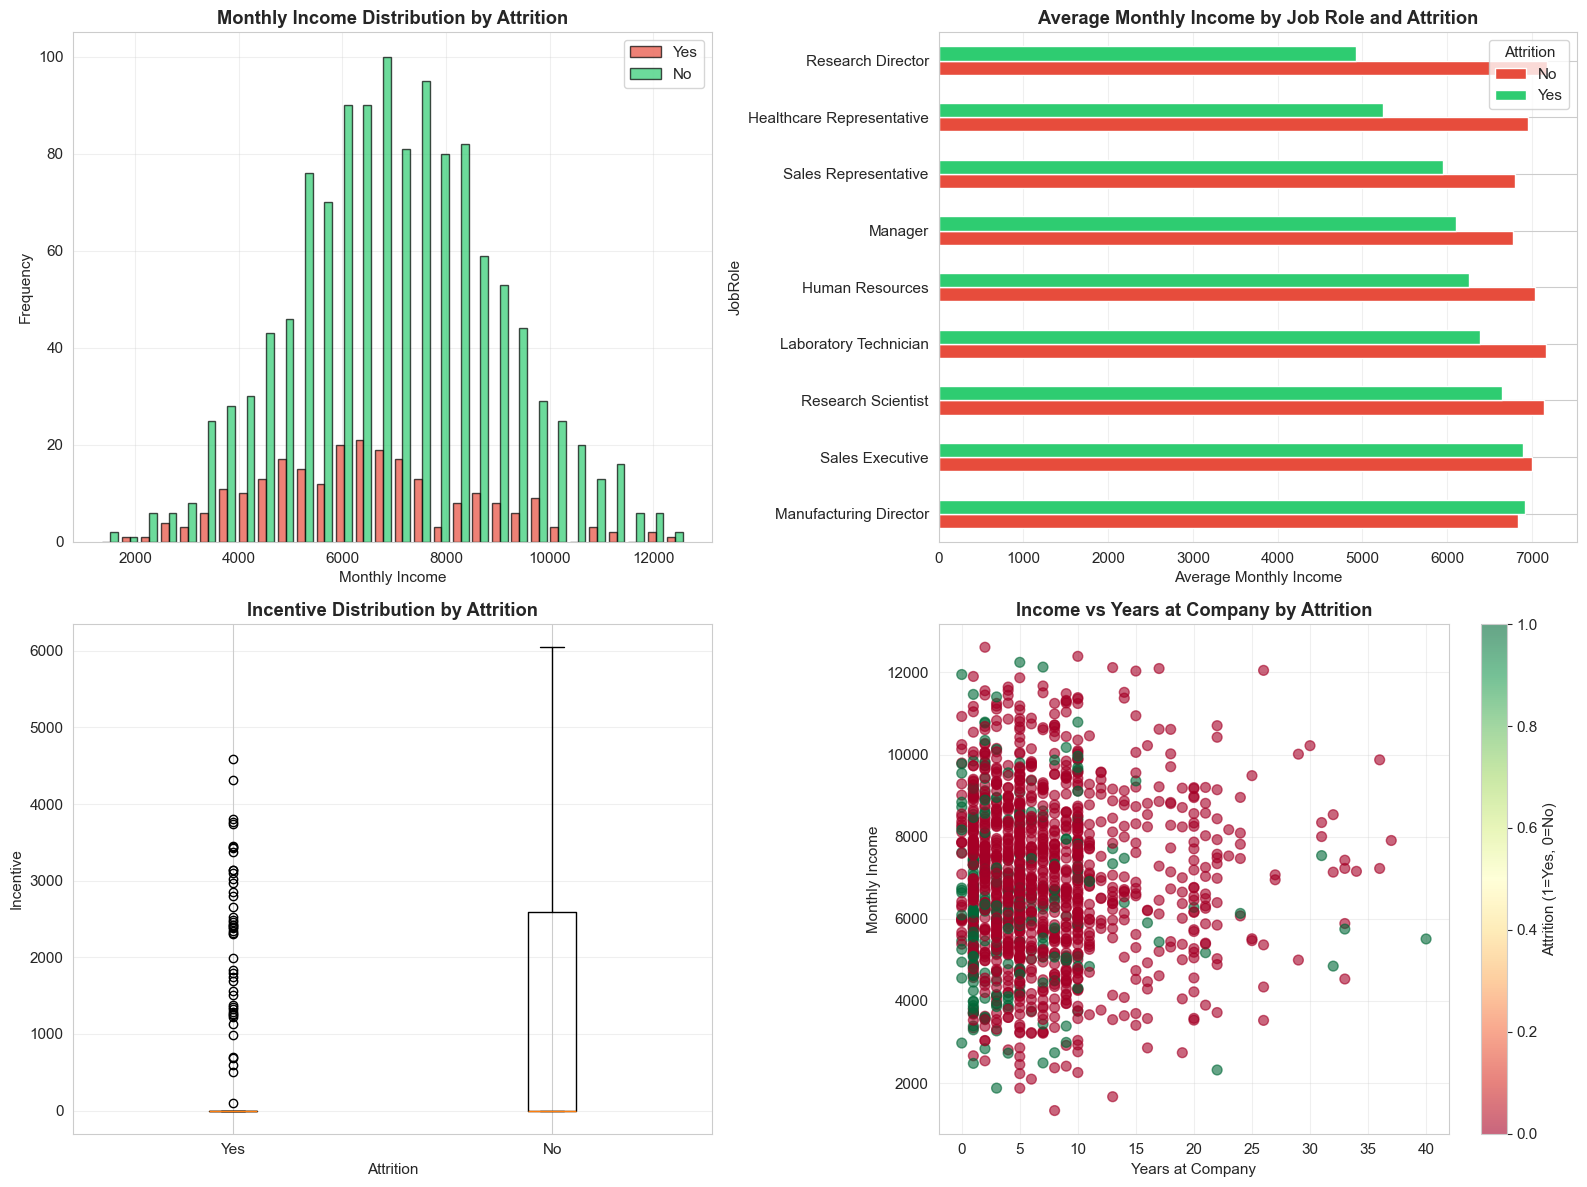

In [7]:
# Income analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Monthly Income distribution
axes[0, 0].hist([df[df['Attrition']=='Yes']['MonthlyIncome'], df[df['Attrition']=='No']['MonthlyIncome']], 
                bins=30, label=['Yes', 'No'], color=[attrition_colors['Yes'], attrition_colors['No']], alpha=0.7, edgecolor='black')
axes[0, 0].set_xlabel('Monthly Income')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Monthly Income Distribution by Attrition', fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Income by Job Role
income_by_role = df.groupby(['JobRole', 'Attrition'])['MonthlyIncome'].mean().unstack()
income_by_role = income_by_role.sort_values('Yes', ascending=False)
income_by_role.plot(kind='barh', ax=axes[0, 1], color=[attrition_colors['Yes'], attrition_colors['No']])
axes[0, 1].set_title('Average Monthly Income by Job Role and Attrition', fontweight='bold')
axes[0, 1].set_xlabel('Average Monthly Income')
axes[0, 1].legend(title='Attrition')
axes[0, 1].grid(True, alpha=0.3, axis='x')

# Incentive analysis
axes[1, 0].boxplot([df[df['Attrition']=='Yes']['Incentive'], df[df['Attrition']=='No']['Incentive']], 
                   labels=['Yes', 'No'])
axes[1, 0].set_ylabel('Incentive')
axes[1, 0].set_xlabel('Attrition')
axes[1, 0].set_title('Incentive Distribution by Attrition', fontweight='bold')
axes[1, 0].grid(True, alpha=0.3, axis='y')

# Income vs Years at Company
scatter = axes[1, 1].scatter(df['YearsAtCompany'], df['MonthlyIncome'], 
                            c=df['Attrition'].map({'Yes': 1, 'No': 0}), 
                            cmap='RdYlGn', alpha=0.6, s=50)
axes[1, 1].set_xlabel('Years at Company')
axes[1, 1].set_ylabel('Monthly Income')
axes[1, 1].set_title('Income vs Years at Company by Attrition', fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)
plt.colorbar(scatter, ax=axes[1, 1], label='Attrition (1=Yes, 0=No)')

plt.tight_layout()
save_figure(fig, '05_income_analysis.png')
plt.show()


## 6. Stress and Performance Metrics


Figure saved to: C:\Users\ADMIN\Documents\GitHub\Business-Analytics\outputs\figures\06_stress_performance.png


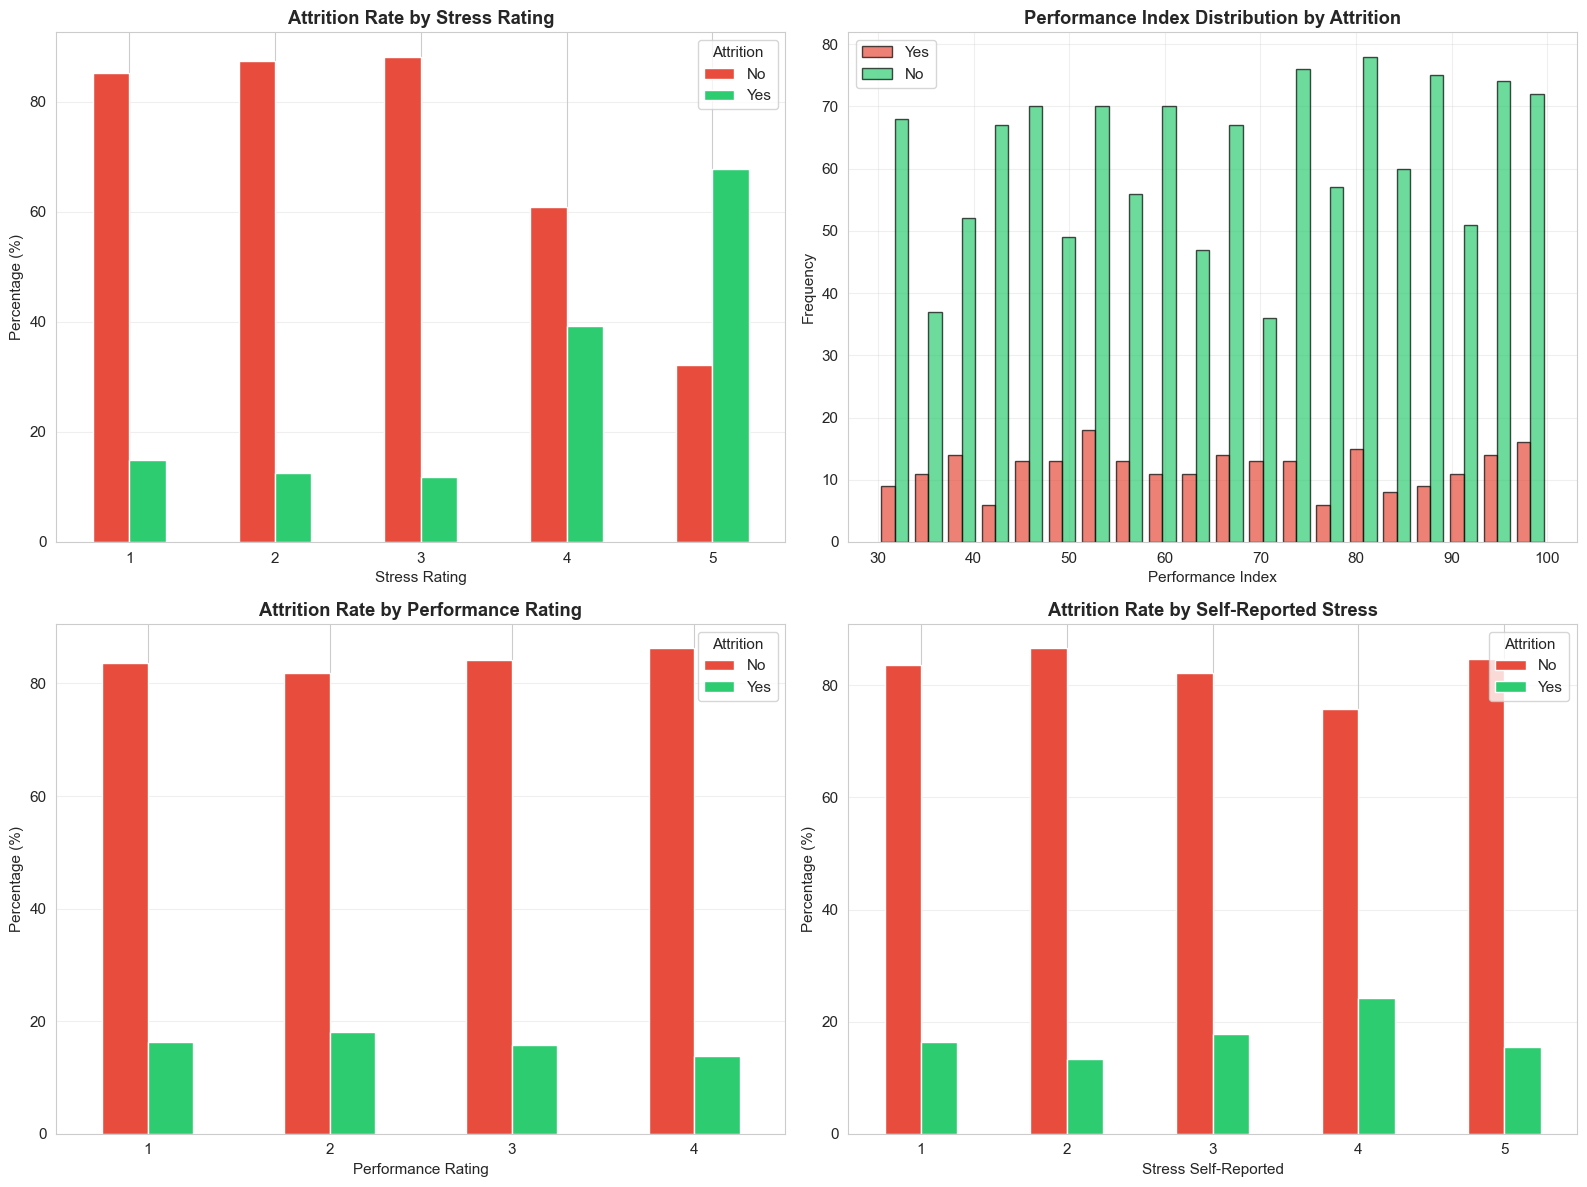

In [8]:
# Stress and Performance
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Stress Rating
stress_attrition = pd.crosstab(df['StressRating'], df['Attrition'], normalize='index') * 100
stress_attrition.plot(kind='bar', ax=axes[0, 0], color=[attrition_colors['Yes'], attrition_colors['No']])
axes[0, 0].set_title('Attrition Rate by Stress Rating', fontweight='bold')
axes[0, 0].set_ylabel('Percentage (%)')
axes[0, 0].set_xlabel('Stress Rating')
axes[0, 0].legend(title='Attrition')
axes[0, 0].tick_params(axis='x', rotation=0)
axes[0, 0].grid(True, alpha=0.3, axis='y')

# Performance Index
axes[0, 1].hist([df[df['Attrition']=='Yes']['PerformanceIndex'], df[df['Attrition']=='No']['PerformanceIndex']], 
                bins=20, label=['Yes', 'No'], color=[attrition_colors['Yes'], attrition_colors['No']], alpha=0.7, edgecolor='black')
axes[0, 1].set_xlabel('Performance Index')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Performance Index Distribution by Attrition', fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Performance Rating
perf_attrition = pd.crosstab(df['PerformanceRating'], df['Attrition'], normalize='index') * 100
perf_attrition.plot(kind='bar', ax=axes[1, 0], color=[attrition_colors['Yes'], attrition_colors['No']])
axes[1, 0].set_title('Attrition Rate by Performance Rating', fontweight='bold')
axes[1, 0].set_ylabel('Percentage (%)')
axes[1, 0].set_xlabel('Performance Rating')
axes[1, 0].legend(title='Attrition')
axes[1, 0].tick_params(axis='x', rotation=0)
axes[1, 0].grid(True, alpha=0.3, axis='y')

# Stress Self-Reported
stress_self_attrition = pd.crosstab(df['StressSelfReported'], df['Attrition'], normalize='index') * 100
stress_self_attrition.plot(kind='bar', ax=axes[1, 1], color=[attrition_colors['Yes'], attrition_colors['No']])
axes[1, 1].set_title('Attrition Rate by Self-Reported Stress', fontweight='bold')
axes[1, 1].set_ylabel('Percentage (%)')
axes[1, 1].set_xlabel('Stress Self-Reported')
axes[1, 1].legend(title='Attrition')
axes[1, 1].tick_params(axis='x', rotation=0)
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
save_figure(fig, '06_stress_performance.png')
plt.show()


## 7. Key Insights Summary


In [9]:
# Calculate key statistics
print("=" * 60)
print("KEY INSIGHTS SUMMARY")
print("=" * 60)

# Overall attrition rate
overall_attrition = (df['Attrition'] == 'Yes').sum() / len(df) * 100
print(f"\n1. Overall Attrition Rate: {overall_attrition:.2f}%")

# Top factors
print("\n2. Attrition Rate by Key Factors:")
factors = {
    'Overtime': 'OverTime',
    'Business Travel (Frequently)': 'BusinessTravel',
    'Department': 'Department',
    'Marital Status': 'MaritalStatus'
}

for factor_name, factor_col in factors.items():
    if factor_col in df.columns:
        factor_attrition = df.groupby(factor_col)['Attrition'].apply(lambda x: (x == 'Yes').sum() / len(x) * 100)
        max_attrition = factor_attrition.idxmax()
        max_rate = factor_attrition.max()
        print(f"   - {factor_name}: Highest in '{max_attrition}' ({max_rate:.2f}%)")

# Income difference
income_yes = df[df['Attrition'] == 'Yes']['MonthlyIncome'].mean()
income_no = df[df['Attrition'] == 'No']['MonthlyIncome'].mean()
print(f"\n3. Average Monthly Income:")
print(f"   - Employees who left: ${income_yes:,.2f}")
print(f"   - Employees who stayed: ${income_no:,.2f}")
print(f"   - Difference: ${income_no - income_yes:,.2f}")

# Years at company
years_yes = df[df['Attrition'] == 'Yes']['YearsAtCompany'].mean()
years_no = df[df['Attrition'] == 'No']['YearsAtCompany'].mean()
print(f"\n4. Average Years at Company:")
print(f"   - Employees who left: {years_yes:.2f} years")
print(f"   - Employees who stayed: {years_no:.2f} years")

print("\n" + "=" * 60)


KEY INSIGHTS SUMMARY

1. Overall Attrition Rate: 16.19%

2. Attrition Rate by Key Factors:
   - Overtime: Highest in '58' (100.00%)
   - Business Travel (Frequently): Highest in 'Travel_Frequently' (23.47%)
   - Department: Highest in 'Sales' (20.18%)
   - Marital Status: Highest in 'Single' (24.36%)

3. Average Monthly Income:
   - Employees who left: $6,452.71
   - Employees who stayed: $7,012.96
   - Difference: $560.25

4. Average Years at Company:
   - Employees who left: 5.02 years
   - Employees who stayed: 7.39 years

